# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Importing Data from Kaggle "SWELL" Dataset.

In [2]:
train = pd.read_csv("../input/swell-heart-rate-variability-hrv/hrv dataset/data/final/train.csv")
test = pd.read_csv("../input/swell-heart-rate-variability-hrv/hrv dataset/data/final/test.csv")

In [3]:
train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,6.797519,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,2.096850,1.314910,2,no stress
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,9.734243,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,2.131264,1.175975,2,no stress
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,16.304530,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,2.215643,1.140232,2,no stress
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,11.838553,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,2.091628,1.181937,2,no stress


In [4]:
test

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,721.901897,727.267280,74.722315,12.361264,12.361069,6.044877,84.121868,4.933333,0.000000,8.743513,...,66.617057,3.921868,9.760289,1698.605390,9.245599,0.108160,2.097342,1.243696,2,no stress
1,843.538633,844.407930,58.499429,19.298880,19.298795,3.031234,71.478642,21.000000,0.200000,13.650863,...,26.500086,1.123416,1.663151,2358.884694,59.126832,0.016913,2.217275,1.250056,2,time pressure
2,958.523868,966.671125,132.849110,21.342715,21.342653,6.224565,63.874293,24.133333,1.800000,15.096571,...,16.024935,0.370208,0.766416,4328.633724,129.477524,0.007723,2.217136,1.144943,2,no stress
3,824.838669,842.485905,117.822094,11.771814,11.771248,10.008830,74.330531,4.733333,0.533333,8.326307,...,17.581470,0.615932,3.358652,2854.449091,28.773854,0.034754,2.106863,1.142355,2,no stress
4,756.707933,747.941620,143.968457,13.357748,13.356388,10.777899,82.092049,5.933333,0.666667,9.447545,...,35.199054,0.662879,6.292253,5310.027472,14.892559,0.067148,1.912191,1.128098,2,interruption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41028,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2,time pressure
41029,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,2,interruption
41030,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,2,no stress
41031,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,2,no stress


In [5]:
train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

<BarContainer object of 3 artists>

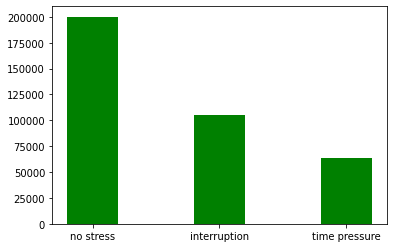

In [6]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

# Encoding classification labels in "Condition" column

In [7]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
test['condition'] = le.transform(test['condition'])

# Analysing Data using Pandas Profiling

In [8]:
profile = pp.ProfileReport(train)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/49 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Plotting Pearson's Correlation Matrix to check dependency of variables

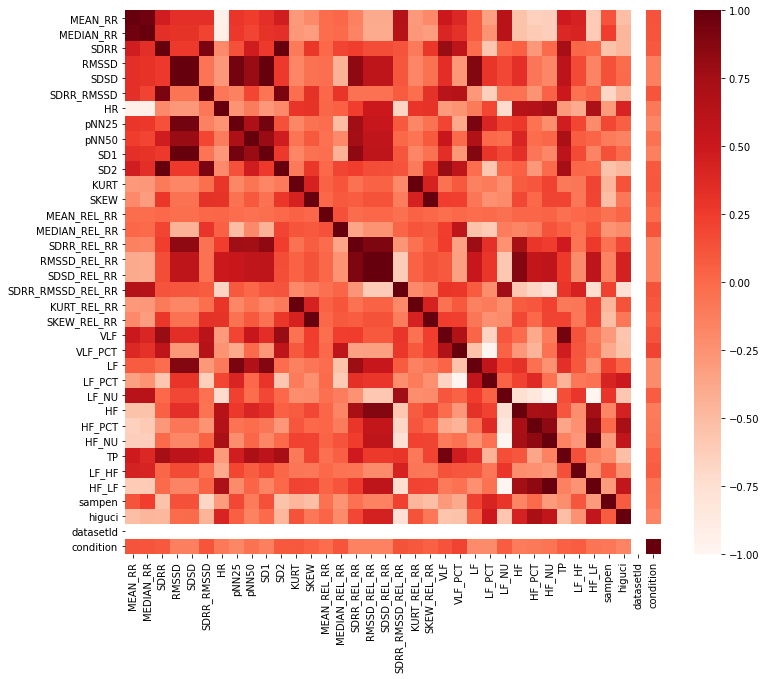

In [9]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

# Defining a feature selection function 

This function selects features which have a positive pearson's correlation with "condition" column of data. A suitable threshold is set for selcting such features.

In [10]:
def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train.iloc[:,i])
    return pd.DataFrame(selected_features).T

In [11]:
CORRELATION_THRESHOLD = 0.1
reduced_train = feature_selection(corr,CORRELATION_THRESHOLD)

In [12]:
reduced_train

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,condition
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287,1.0
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728,0.0
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225,0.0
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308,1.0
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366,1.0
...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,3.785409,0.000083,1.529068,298.009244,45.893349,1.0
369285,984.266492,978.622945,5.443754,0.000046,2.218313,1558.597883,68.405858,1.0
369286,1025.499743,1024.968400,4.134664,-0.002236,2.391601,1950.393956,45.030641,1.0
369287,798.123167,803.559610,4.687302,-0.001354,1.894304,1606.291482,54.821185,1.0


In [26]:
reduced_train.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR_RMSSD', 'MEDIAN_REL_RR',
       'SDRR_RMSSD_REL_RR', 'VLF', 'VLF_PCT', 'condition'],
      dtype='object')

# Plotting some of the extracted features

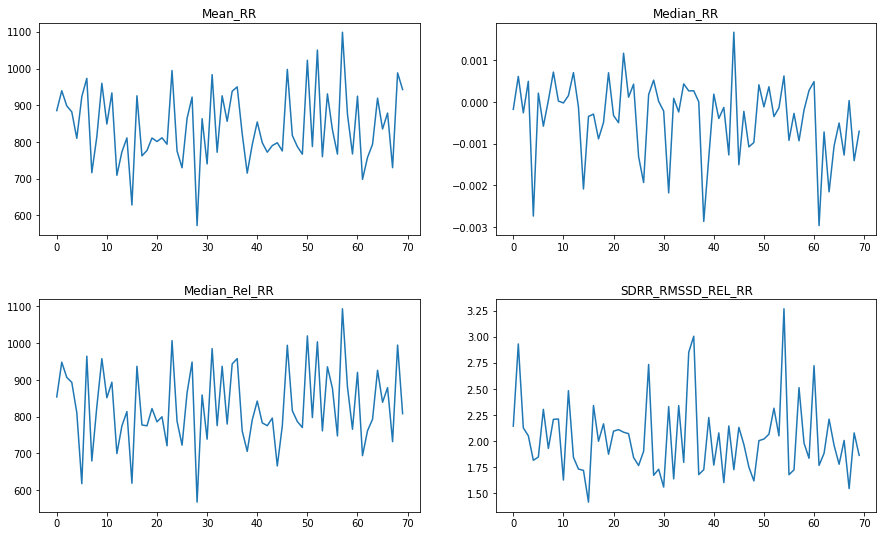

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
reduced_train['MEAN_RR'][:70].plot(ax=axarr[0][0])
reduced_train['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
reduced_train['MEDIAN_REL_RR'][:70].plot(ax=axarr[0][1])
reduced_train['SDRR_RMSSD_REL_RR'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("Median_Rel_RR")
axarr[1][1].set_title("SDRR_RMSSD_REL_RR")
plt.subplots_adjust(hspace=.3)

<AxesSubplot:>

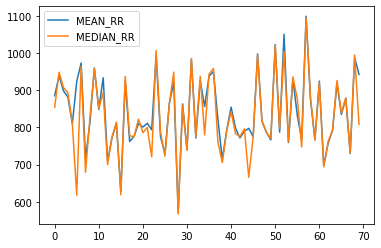

In [14]:
reduced_train[['MEAN_RR','MEDIAN_RR']][:70].plot()

# Splitting data into features and respective labels

In [15]:
X_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]

In [16]:
X_test = test[X_train.columns]
y_test = test['condition']

In [17]:
X_train.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366


In [18]:
X_test.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT
0,721.901897,727.267280,6.044877,-0.000951,1.570800,1016.073759,59.818117
1,843.538633,844.407930,3.031234,-0.001543,1.918953,765.518473,32.452560
2,958.523868,966.671125,6.224565,-0.002000,2.298473,2237.739905,51.696218
3,824.838669,842.485905,10.008830,0.000445,2.116033,2330.980957,81.661325
4,756.707933,747.941620,10.777899,-0.000170,1.681034,4750.624447,89.465158


# Defining a Random Forest model and training it

In [19]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred[:20]

array([1., 2., 1., 1., 0., 2., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0.])

# Printing the model performance and classification report.


In [22]:
accuracy_score(y_test,y_pred)

1.0

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



# Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Perform K-Fold Cross Validation ( use 5 folds )
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy of each fold:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

# Calculate and print the mean cross-validation accuracy
mean_cv_score = cv_scores.mean()
print(f"\nMean cross-validation accuracy: {mean_cv_score:.4f}")


Accuracy of each fold:
Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 1.0000
Fold 4: 1.0000
Fold 5: 1.0000

Mean cross-validation accuracy: 1.0000


# SAVE MODEL FOR USE LATER

In [25]:
import joblib

# Train the model (assuming you already have X_train and y_train)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model to a file
model_path = '/kaggle/working/random_forest_model.pkl'
joblib.dump(model, model_path)

# Print the model path
print(f"Model saved at: {model_path}")



Model saved at: /kaggle/working/random_forest_model.pkl


# TESTING SAVED MODEL

In [28]:
import numpy as np
import pandas as pd
import joblib
from scipy import signal
from scipy.stats import median_abs_deviation
from sklearn.metrics import classification_report

class ECGProcessor:
    def __init__(self, model_path):
        """
        Initialize the ECG processor with a trained model
        
        Parameters:
        model_path (str): Path to the saved model file
        """
        self.model = joblib.load(model_path)
        
    def calculate_rr_intervals(self, ecg_signal, sampling_rate=250):
        """
        Calculate R-R intervals from raw ECG signal
        
        Parameters:
        ecg_signal (array): Raw ECG signal
        sampling_rate (int): Sampling rate of the ECG signal in Hz
        
        Returns:
        array: R-R intervals in milliseconds
        """
        # Find R-peaks using scipy's find_peaks
        r_peaks, _ = signal.find_peaks(ecg_signal, distance=sampling_rate//2)
        
        # Calculate R-R intervals in milliseconds
        rr_intervals = np.diff(r_peaks) * (1000/sampling_rate)
        return rr_intervals
    
    def extract_features(self, ecg_signal, sampling_rate=250):
        """
        Extract features from ECG signal
        
        Parameters:
        ecg_signal (array): Raw ECG signal
        sampling_rate (int): Sampling rate of the ECG signal in Hz
        
        Returns:
        dict: Dictionary containing extracted features
        """
        # Calculate R-R intervals
        rr_intervals = self.calculate_rr_intervals(ecg_signal, sampling_rate)
        
        # Calculate relative R-R intervals
        rel_rr = np.diff(rr_intervals)
        
        # Calculate features
        features = {
            'MEAN_RR': np.mean(rr_intervals),
            'MEDIAN_RR': np.median(rr_intervals),
            'SDRR_RMSSD': np.sqrt(np.mean(np.square(np.diff(rr_intervals)))),
            'MEDIAN_REL_RR': np.median(rel_rr),
            'SDRR_RMSSD_REL_RR': np.sqrt(np.mean(np.square(np.diff(rel_rr)))),
        }
        
        # Calculate VLF features using FFT
        freqs, psd = signal.welch(rr_intervals, fs=sampling_rate, 
                                nperseg=len(rr_intervals))
        vlf_mask = freqs <= 0.04  # VLF range: 0-0.04 Hz
        features['VLF'] = np.sum(psd[vlf_mask])
        features['VLF_PCT'] = np.sum(psd[vlf_mask]) / np.sum(psd)
        
        return features
    
    def preprocess_and_predict(self, ecg_signal, sampling_rate=250):
        """
        Preprocess ECG signal and make prediction
        
        Parameters:
        ecg_signal (array): Raw ECG signal
        sampling_rate (int): Sampling rate of the ECG signal in Hz
        
        Returns:
        tuple: (prediction, features)
        """
        # Extract features
        features = self.extract_features(ecg_signal, sampling_rate)
        
        # Convert features to DataFrame in the correct order
        feature_df = pd.DataFrame([features])[['MEAN_RR', 'MEDIAN_RR', 'SDRR_RMSSD', 
                                            'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR', 
                                            'VLF', 'VLF_PCT']]
        
        # Make prediction
        prediction = self.model.predict(feature_df)[0]
        
        return prediction, features

def main():
    # Load model and create processor
    model_path = '/kaggle/input/stress-3-class-swell-rf/random_forest_model.pkl'
    processor = ECGProcessor(model_path)
    
    # # Load test data ( X_test is  feature DataFrame and y_test contains true labels)
    # X_test = pd.read_csv('path_to_your_test_features.csv')  # Replace with your test data path
    # y_test = pd.read_csv('path_to_your_test_labels.csv')    # Replace with your test labels path
    
    # Make predictions on test data
    y_pred = processor.model.predict(X_test)
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print detailed predictions for a few examples
    print("\nDetailed predictions for first 5 samples:")
    for i in range(min(5, len(X_test))):
        print(f"\nSample {i+1}:")
        print(f"True label: {y_test.iloc[i]}")
        print(f"Predicted label: {y_pred[i]}")
        print("Features:")
        for col in X_test.columns:
            print(f"{col}: {X_test.iloc[i][col]:.4f}")

if __name__ == "__main__":
    main()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033


Detailed predictions for first 5 samples:

Sample 1:
True label: 1
Predicted label: 1.0
Features:
MEAN_RR: 721.9019
MEDIAN_RR: 727.2673
SDRR_RMSSD: 6.0449
MEDIAN_REL_RR: -0.0010
SDRR_RMSSD_REL_RR: 1.5708
VLF: 1016.0738
VLF_PCT: 59.8181

Sample 2:
True label: 2
Predicted label: 2.0
Features:
MEAN_RR: 843.5386
MEDIAN_RR: 844.4079
SDRR_RMSSD: 3.0312
MEDIAN_REL_RR: -0.0015
SDRR_RMSSD_REL_RR: 1.9190
VLF: 765.5185
VLF_PCT: 32.4526

Sample 3:
True label: 1
Predicted label: 1.0
Features:
MEAN_RR: 958.5239
MEDIAN_RR: 966.6711
SDRR_RMSSD: 6.2246
MEDIAN_REL_RR: -0.0020
SDRR_RMSSD_REL_RR: 2.2985
VLF